# Load Libraries

In [74]:
!pip install imblearn
import pandas as pd

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from ipywidgets import interact
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import ipywidgets as widgets
import seaborn as sns
from sklearn.metrics import classification_report

# Prepare Data

In [3]:
data = pd.read_csv('/Users/loufuhao/Desktop/corporate_rating.csv')

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Name                                2029 non-null   object 
 2   Symbol                              2029 non-null   object 
 3   Rating Agency Name                  2029 non-null   object 
 4   Date                                2029 non-null   object 
 5   Sector                              2029 non-null   object 
 6   currentRatio                        2029 non-null   float64
 7   quickRatio                          2029 non-null   float64
 8   cashRatio                           2029 non-null   float64
 9   daysOfSalesOutstanding              2029 non-null   float64
 10  netProfitMargin                     2029 non-null   float64
 11  pretaxProfitMargin                  2029 no

In [5]:
print(data.head)

<bound method NDFrame.head of      Rating                         Name Symbol  \
0         A        Whirlpool Corporation    WHR   
1       BBB        Whirlpool Corporation    WHR   
2       BBB        Whirlpool Corporation    WHR   
3       BBB        Whirlpool Corporation    WHR   
4       BBB        Whirlpool Corporation    WHR   
...     ...                          ...    ...   
2024    BBB                    NVR, Inc.    NVR   
2025     BB  Kaiser Aluminum Corporation   KALU   
2026      B       Cresud S.A.C.I.F. y A.  CRESY   
2027      B       Cresud S.A.C.I.F. y A.  CRESY   
2028    CCC       Cresud S.A.C.I.F. y A.  CRESY   

                      Rating Agency Name        Date             Sector  \
0             Egan-Jones Ratings Company  11/27/2015  Consumer Durables   
1             Egan-Jones Ratings Company   2/13/2014  Consumer Durables   
2                          Fitch Ratings    3/6/2015  Consumer Durables   
3                          Fitch Ratings   6/15/2012  Con

In [6]:
data.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


In [7]:
data = data.drop(["Name","Symbol","Rating Agency Name","Date","Sector"],axis=1)
data.head()

,Rating,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


<AxesSubplot:title={'center':'Class Balance'}, xlabel='Rating', ylabel='Frequency'>

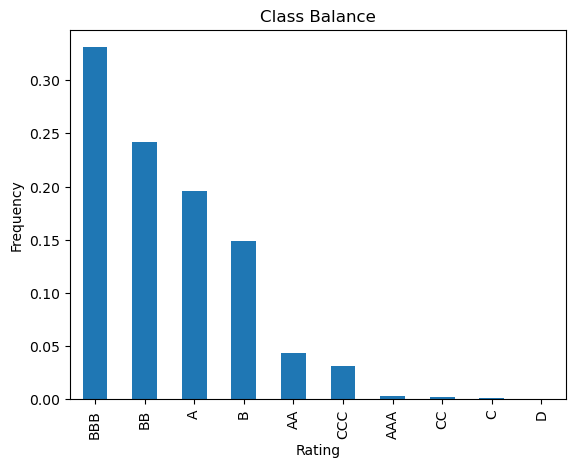

In [8]:
data["Rating"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Rating",
    ylabel="Frequency",
    title="Class Balance"
)

In [57]:
data=data[data['Rating']!='AAA']
data= data[data['Rating']!='CC']  
data= data[data['Rating']!='C'] 
data= data[data['Rating']!='D'] 
data= data[data['Rating']!='CCC'] 
data= data[data['Rating']!='AA'] 
data.reset_index(inplace = True, drop=True)
print(data.head)

<bound method NDFrame.head of      Rating  currentRatio  quickRatio  cashRatio  daysOfSalesOutstanding  \
0         A      0.945894    0.426395   0.099690               44.203245   
1       BBB      1.033559    0.498234   0.203120               38.991156   
2       BBB      0.963703    0.451505   0.122099               50.841385   
3       BBB      1.019851    0.510402   0.176116               41.161738   
4       BBB      0.957844    0.495432   0.141608               47.761126   
...     ...           ...         ...        ...                     ...   
1856     BB      3.919105    2.525982   1.286356               22.306532   
1857    BBB     11.757767    7.115059   7.057420                1.079762   
1858     BB      2.962788    1.294743   0.428234               30.602414   
1859      B      0.883875    0.842553   0.233830              147.599371   
1860      B      0.911713    0.748356   0.310640              131.644566   

      netProfitMargin  pretaxProfitMargin  grossProfitMar

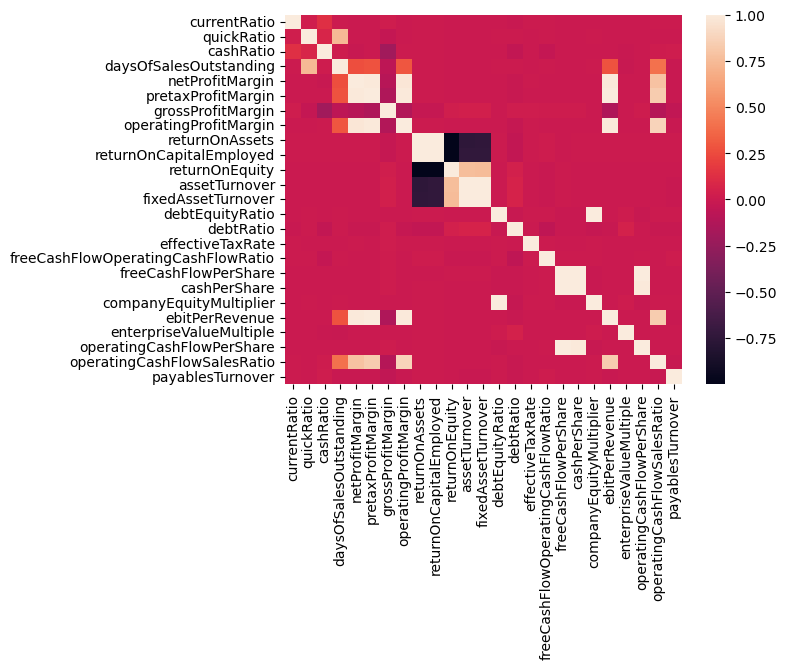

In [58]:
corr = data.drop(columns="Rating").corr()
corr.head()
sns.heatmap(corr);

# Build Model

In [59]:
target = "Rating"
X = data.drop(columns = "Rating")
y= data[target]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=40
)


In [61]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1302, 25)
y_train shape: (1302,)
X_test shape: (559, 25)
y_test shape: (559,)


In [62]:
over_sampler = RandomOverSampler(random_state=40)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(1944, 25)


,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,0.168476,0.030660,0.029855,0.000000,0.151051,0.151051,0.409687,0.173862,0.057524,0.071823,...,0.000000,0.008872,0.103164,0.629226,2.445929,0.151051,12.241731,11.628574,0.296207,16.427532
1,1.100220,0.613550,0.203648,31.111023,0.131843,0.208835,1.000000,0.236736,0.045288,0.078878,...,0.368674,0.167113,1.223228,2.184012,3.829823,0.208835,5.593361,7.319759,0.256447,1.277008
2,1.375924,1.005528,0.265607,82.523353,0.084281,0.125860,0.288831,0.042765,0.067416,0.138434,...,0.360316,0.200262,0.360849,13.004717,3.246713,0.125860,5.315076,1.801887,0.016183,7.267316
3,3.090800,1.897213,1.108181,38.525014,0.035156,0.044296,0.384791,0.064098,0.036065,0.052669,...,0.208145,0.813365,2.528856,3.880378,2.515986,0.044296,13.011657,3.109129,0.118777,10.122016
4,0.849299,0.385759,0.045182,47.155107,0.129345,0.138110,1.000000,0.252744,0.033875,0.042040,...,0.492274,-0.195456,-1.159495,1.733195,4.303041,0.138110,12.608337,5.932262,0.261662,3.326199


In [63]:
y_train_over.value_counts(normalize=True)

BB     0.25
BBB    0.25
A      0.25
B      0.25
Name: Rating, dtype: float64

In [64]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.3733


# Iterate

In [51]:
clf = make_pipeline(SimpleImputer(),GradientBoostingClassifier())

In [52]:
params = {
    "simpleimputer__strategy": ["mean","median"],
    "gradientboostingclassifier__n_estimators":range(20,31,5),
    "gradientboostingclassifier__max_depth":range(2,5)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__n_estimators': range(20, 31, 5),
 'gradientboostingclassifier__max_depth': range(2, 5)}

In [53]:
model = GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1, verbose=1)

In [54]:
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [22]:
results = pd.DataFrame(model.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,6.642894,0.064676,0.011192,0.002148,4,30,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.822451,0.808706,0.823597,0.870561,0.868270,0.838717,0.025618,1
17,6.124542,0.513464,0.009915,0.000655,4,30,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.821306,0.807560,0.830470,0.862543,0.868270,0.838030,0.023582,2
15,5.499607,0.056114,0.009463,0.000844,4,25,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.815578,0.797251,0.822451,0.852234,0.855670,0.828637,0.022278,3
14,5.387037,0.113574,0.009078,0.000233,4,25,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.814433,0.804124,0.816724,0.852234,0.855670,0.828637,0.021129,3
12,4.367146,0.042795,0.010364,0.002689,4,20,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.807560,0.800687,0.806415,0.836197,0.847652,0.819702,0.018648,5
13,4.293385,0.029866,0.007928,0.000093,4,20,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.804124,0.799542,0.808706,0.827033,0.847652,0.817411,0.017769,6
10,5.158281,0.106973,0.008238,0.000575,3,30,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.784651,0.783505,0.782360,0.805269,0.813288,0.793814,0.012899,7
11,5.175146,0.066450,0.008191,0.000191,3,30,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.785796,0.783505,0.781214,0.796105,0.813288,0.791982,0.011807,8
9,4.188296,0.070773,0.008528,0.002131,3,25,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.777778,0.776632,0.775487,0.791523,0.802978,0.784880,0.010755,9
8,4.184595,0.048477,0.007605,0.000225,3,25,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.777778,0.775487,0.774341,0.788087,0.802978,0.783734,0.010780,10


In [55]:
model.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'median'}

# Evaluate

In [24]:
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)


print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.7986
Validation Accuracy: 0.4039


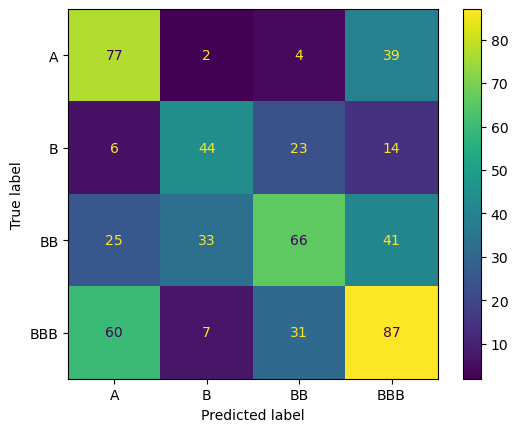

In [56]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

In [65]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           A       0.46      0.63      0.53       122
           B       0.51      0.51      0.51        87
          BB       0.53      0.40      0.46       165
         BBB       0.48      0.47      0.48       185

    accuracy                           0.49       559
   macro avg       0.50      0.50      0.49       559
weighted avg       0.50      0.49      0.49       559



In [66]:
y_test_pred = model.predict(X_test)
y_test_pred = pd.Series(y_test_pred,index=X_test.index,name="Rating")

In [73]:
y_test_pred.head(10).sort_values

<bound method Series.sort_values of 836      BB
154       A
1495      A
627     BBB
1217    BBB
905      BB
1004      A
1233      A
1432     BB
605       A
Name: Rating, dtype: object>